In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, Normalizer, OneHotEncoder
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from prettytable import PrettyTable


In [2]:
# importing all the 9 datasets

customers_dataset=pd.read_csv("olist_customers_dataset.csv")
geolocation_dataset=pd.read_csv("olist_geolocation_dataset.csv")
order_items_dataset=pd.read_csv("olist_order_items_dataset.csv")
order_payments_dataset=pd.read_csv('olist_order_payments_dataset.csv')
order_reviews_dataset=pd.read_csv('olist_order_reviews_dataset.csv')
orders_dataset=pd.read_csv('olist_orders_dataset.csv')
products_dataset=pd.read_csv('olist_products_dataset.csv')
sellers_dataset=pd.read_csv('olist_sellers_dataset.csv')
product_category_name_translation=pd.read_csv('product_category_name_translation.csv')

# 1) Understanding the Data

### Overview of all the tables

In [3]:
# ref - https://www.analyticsvidhya.com/blog/2021/06/style-your-pandas-dataframe-and-make-it-stunning/

tables=[customers_dataset,geolocation_dataset,orders_dataset,order_items_dataset,order_payments_dataset,order_reviews_dataset
       ,products_dataset,sellers_dataset,product_category_name_translation]
overview=pd.DataFrame()
overview['Table Name']=['Customers','Geolocations','Orders','Order Items','Order Payments','Order Reviews','Products','Sellers'
                       ,'Product Category Name']
overview['Total Rows']=[i.shape[0] for i in tables]
overview['Total Columns']=[i.shape[1] for i in tables]
overview['Columns']=[",".join(list(i.columns)) for i in tables]
overview.style.background_gradient()

,Table Name,Total Rows,Total Columns,Columns
0,Customers,99441,5,"customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state"
1,Geolocations,1000163,5,"geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state"
2,Orders,99441,8,"order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date"
3,Order Items,112650,7,"order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value"
4,Order Payments,103886,5,"order_id,payment_sequential,payment_type,payment_installments,payment_value"
5,Order Reviews,99224,7,"review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp"
6,Products,32951,9,"product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm"
7,Sellers,3095,4,"seller_id,seller_zip_code_prefix,seller_city,seller_state"
8,Product Category Name,71,2,"product_category_name,product_category_name_english"


In [4]:
## Changing the column name to zip_code_prefix in Customers, Geolocations and Sellers as it is primary and foreign key
customers_dataset.rename(columns={'customer_zip_code_prefix':'zip_code_prefix'},inplace=True)
geolocation_dataset.rename(columns={'geolocation_zip_code_prefix':'zip_code_prefix'},inplace=True)
sellers_dataset.rename(columns={'seller_zip_code_prefix':'zip_code_prefix'},inplace=True)
products_dataset.rename(columns={'product_name_lenght':'product_name_length'},inplace=True)
products_dataset.rename(columns={'product_description_lenght':'product_description_length'},inplace=True)


## Univariate Analysis

### 1) customers_dataset

In [5]:
customers_dataset.head()

,customer_id,customer_unique_id,zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
customers_dataset.shape

(99441, 5)

In [7]:
customers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         99441 non-null  object
 1   customer_unique_id  99441 non-null  object
 2   zip_code_prefix     99441 non-null  int64 
 3   customer_city       99441 non-null  object
 4   customer_state      99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [8]:
## Checking null values
customers_dataset.isnull().sum()

customer_id           0
customer_unique_id    0
zip_code_prefix       0
customer_city         0
customer_state        0
dtype: int64

There are no null values

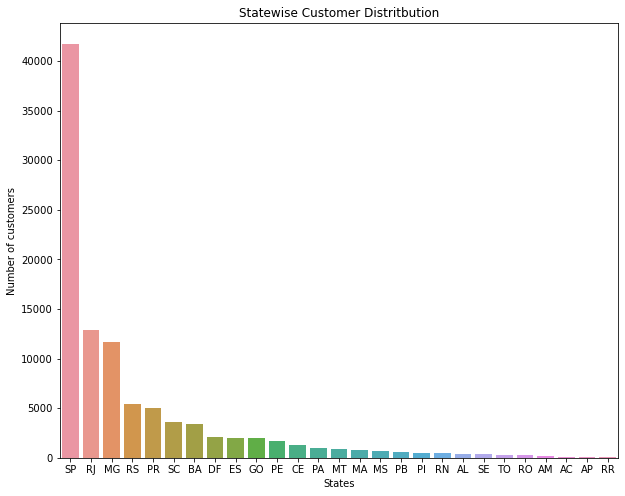

In [9]:
plt.figure(figsize=(10,8))
sns.countplot(x=customers_dataset['customer_state'],order=customers_dataset['customer_state'].value_counts().index)
plt.ylabel('Number of customers')
plt.xlabel('States')
plt.title('Statewise Customer Distritbution')
plt.show()

We can see that majority of the customer's base is in State 'SP' then 'RJ' and 'MG'.

Text(0.5, 1.0, 'Top 10 cities population wise')

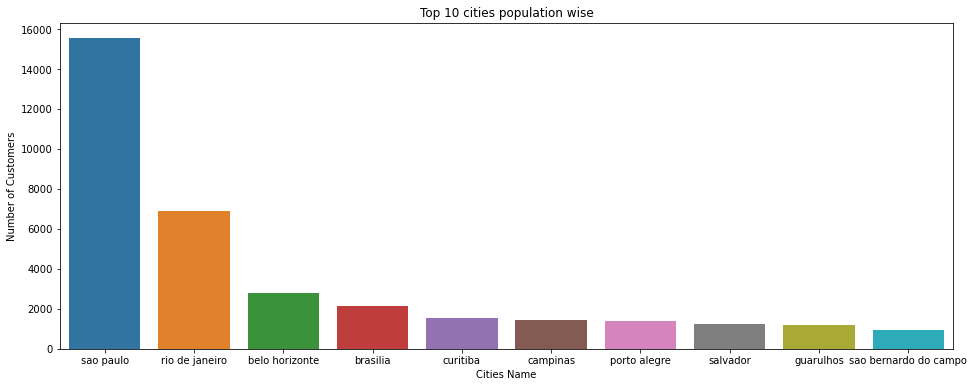

In [10]:
# ref - https://stackoverflow.com/questions/32891211/limit-the-number-of-groups-shown-in-seaborn-countplot

plt.figure(figsize=(16,6))
sns.countplot(x=customers_dataset.customer_city,order=customers_dataset.customer_city.value_counts().iloc[:10].index)
plt.xlabel('Cities Name')
plt.ylabel('Number of Customers')
plt.title('Top 10 cities population wise')

Customers in 'Sao Paulo' which is in State 'SP' has the highest population followed by 'rio de janeiro' which is in state 'RJ'.

### 2) geolocation_dataset

In [11]:
geolocation_dataset.head()

,zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [12]:
geolocation_dataset.shape

(1000163, 5)

In [13]:
geolocation_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   zip_code_prefix    1000163 non-null  int64  
 1   geolocation_lat    1000163 non-null  float64
 2   geolocation_lng    1000163 non-null  float64
 3   geolocation_city   1000163 non-null  object 
 4   geolocation_state  1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [14]:
## Checking null values
geolocation_dataset.isnull().sum()

zip_code_prefix      0
geolocation_lat      0
geolocation_lng      0
geolocation_city     0
geolocation_state    0
dtype: int64

There are no null values

In [15]:
## Checking for duplicated entries

print('Total duplicated entries = ',geolocation_dataset.duplicated(subset='zip_code_prefix').sum())
print('Shape before removing duplicates', geolocation_dataset.shape)
geolocation_dataset.drop_duplicates(subset='zip_code_prefix',inplace=True)
print('Shape after removing duplicates', geolocation_dataset.shape)

Total duplicated entries =  981148
Shape before removing duplicates (1000163, 5)
Shape after removing duplicates (19015, 5)


### 3) orders_dataset

In [16]:
orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [17]:
orders_dataset.shape

(99441, 8)

In [18]:
orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [19]:
## Checking null values
orders_dataset.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

There are 3 columns which have null values

In [21]:
## Checking for duplicated entries
print('Number of duplicated entries = ',orders_dataset.duplicated(subset=['order_id','customer_id']).sum())
print('Number of unique order id = ', orders_dataset.order_id.nunique())

Number of duplicated entries =  0
Number of unique order id =  99441


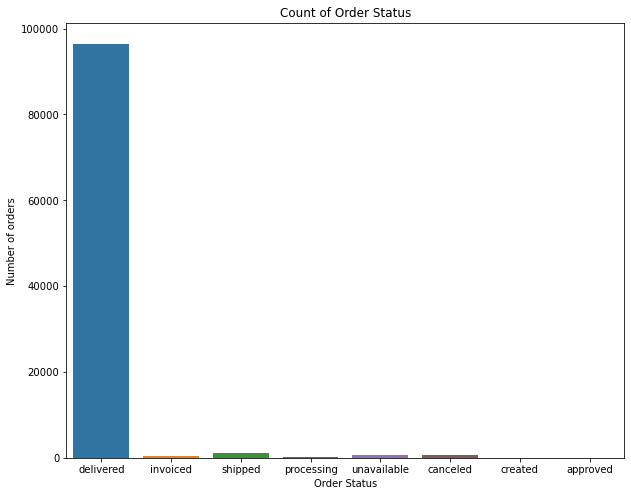

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(x=orders_dataset.order_status)
plt.xlabel('Order Status')
plt.ylabel('Number of orders')
plt.title('Count of Order Status')
plt.show()

In [22]:
print('Percentage of delivered orders = ',len(orders_dataset[orders_dataset['order_status']=='delivered'])/len(orders_dataset)*100)

Percentage of delivered orders =  97.02034372140264


We can see that the number of orders delivered are more than 97 percent. So we will remove other order statuses.

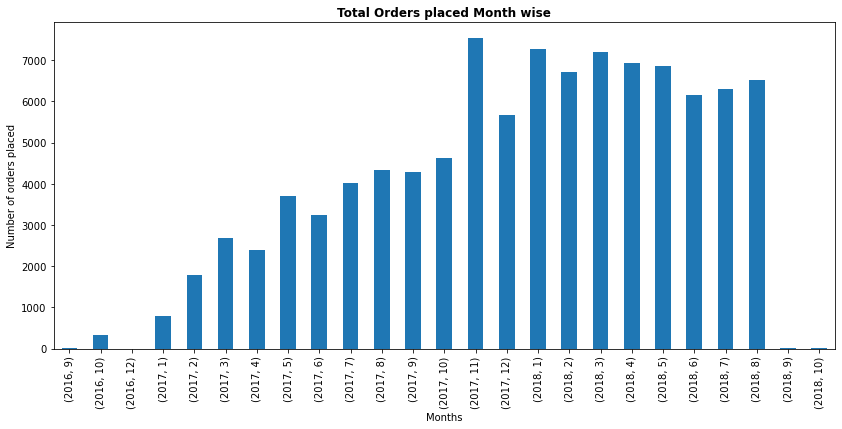

In [23]:
# ref - https://stackoverflow.com/questions/59251691/can-you-extract-both-year-and-month-from-date-in-pandas

orders_dataset.groupby(by=[pd.to_datetime(orders_dataset['order_purchase_timestamp']).dt.year,pd.to_datetime(orders_dataset['order_purchase_timestamp']).dt.month])['order_id'].count().plot(kind='bar',figsize=(14,6))
plt.xlabel('Months')
plt.ylabel('Number of orders placed')
plt.title('Total Orders placed Month wise',fontweight='bold')
plt.show()

Most of the orders were placed in November,2017 followed by January,2018 and March,2018

### 4) order_items_dataset

In [24]:
order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [25]:
order_items_dataset.shape

(112650, 7)

In [26]:
order_items_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [27]:
## Checking for null values
order_items_dataset.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

There are no null values

In [28]:
print('Number of unique orders = ',order_items_dataset.order_id.nunique())

Number of unique orders =  98666


In [29]:
order_items_dataset.order_item_id.value_counts()

1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
20        3
16        3
17        3
18        3
19        3
21        1
Name: order_item_id, dtype: int64

We can see that majority of the customers have ordered one item at a time

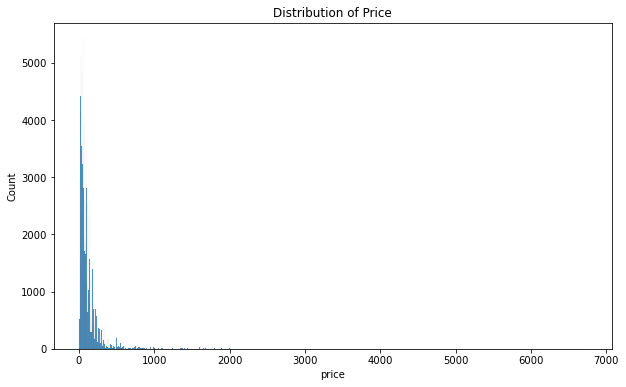

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(x=order_items_dataset.price)
plt.title('Distribution of Price')
plt.show()

The majority of the price values lie below 200

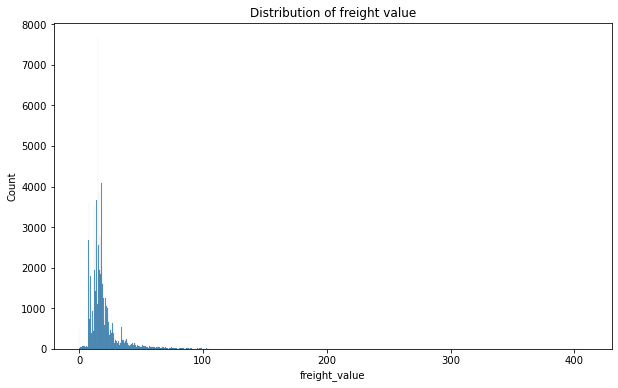

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(x=order_items_dataset.freight_value)
plt.title('Distribution of freight value')
plt.show()

Most of the freight value data has values less than 21

### 5) order_payments_dataset

In [32]:
order_payments_dataset.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [33]:
order_payments_dataset.shape

(103886, 5)

In [34]:
order_payments_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [35]:
## Checking null values
order_payments_dataset.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

There are no null values present

In [36]:
# Checking for duplicated entries
print('Number of unique order id = ', order_payments_dataset.order_id.nunique())

Number of unique order id =  99440


Unique order id should be 99441 which should be equal to unique order ids in orders_dataset, one order id is missing from this data

In [37]:
order_payments_dataset.payment_sequential.value_counts()

1     99360
2      3039
3       581
4       278
5       170
6       118
7        82
8        54
9        43
10       34
11       29
12       21
13       13
14       10
15        8
16        6
17        6
18        6
19        6
20        4
21        4
22        3
23        2
24        2
25        2
26        2
28        1
27        1
29        1
Name: payment_sequential, dtype: int64

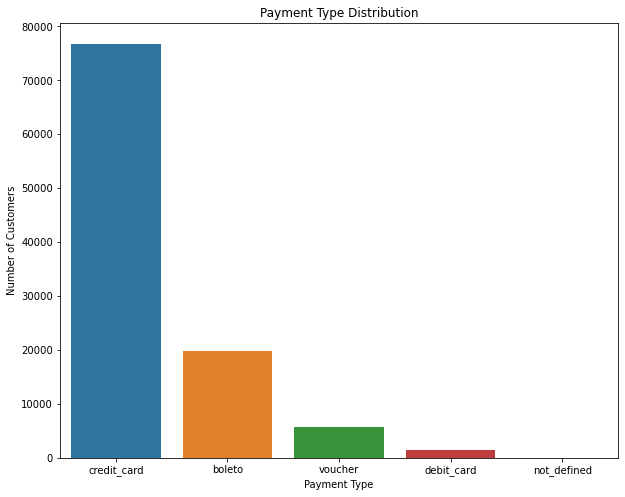

In [38]:
plt.figure(figsize=(10,8))
sns.countplot(x=order_payments_dataset.payment_type)
plt.xlabel('Payment Type')
plt.ylabel('Number of Customers')
plt.title('Payment Type Distribution')
plt.show()

We can see that most of the people have paid via credit card .Payment type 'not defined' is extremely low , so we can remove it

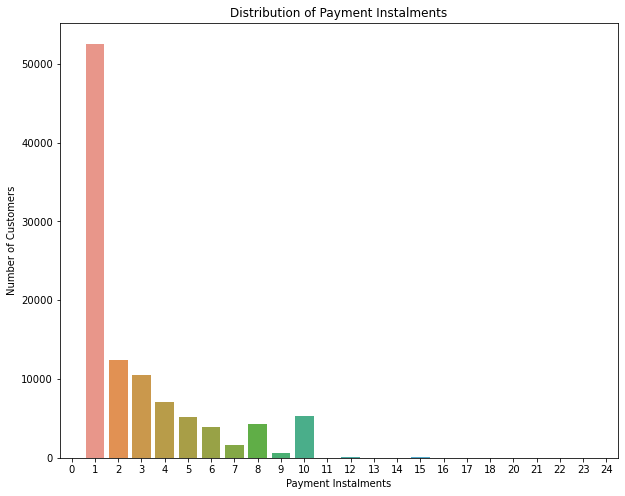

In [39]:
plt.figure(figsize=(10,8))
sns.countplot(x=order_payments_dataset.payment_installments)
plt.xlabel('Payment Instalments')
plt.ylabel('Number of Customers')
plt.title('Distribution of Payment Instalments')
plt.show()

We can observe that most of the people have fully paid in one instalment

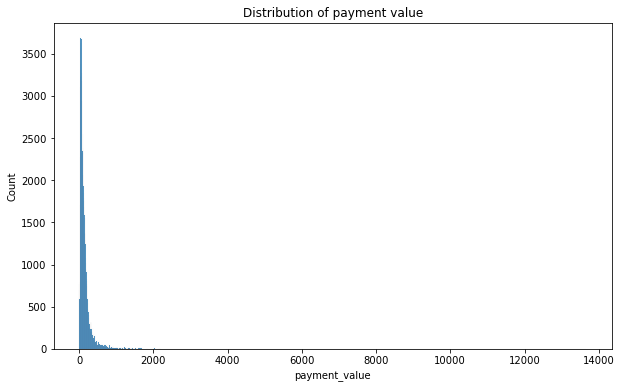

In [40]:
plt.figure(figsize=(10,6))
sns.histplot(x=order_payments_dataset.payment_value)
plt.title('Distribution of payment value')
plt.show()

Payment values have a median value of 100.

### 6) order_reviews_dataset

In [41]:
order_reviews_dataset.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [42]:
order_reviews_dataset.shape

(99224, 7)

In [43]:
## Checking for null values
order_reviews_dataset.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [44]:
print('Percentage of null values in review_comment_title = ', (order_reviews_dataset.review_comment_title.isnull().sum()/order_reviews_dataset.shape[0])*100)
print('Percentage of null values in review_comment_message = ', (order_reviews_dataset.review_comment_message.isnull().sum()/order_reviews_dataset.shape[0])*100)

Percentage of null values in review_comment_title =  88.34153027493349
Percentage of null values in review_comment_message =  58.70253164556962


We can see that more than 50 percent of the comment reviews have null values so we can drop them in the future if required

In [45]:
# Checking for duplicated entries
print('Number of duplicated entries = ', order_reviews_dataset.duplicated(subset=['review_id','order_id']).sum())

Number of duplicated entries =  0


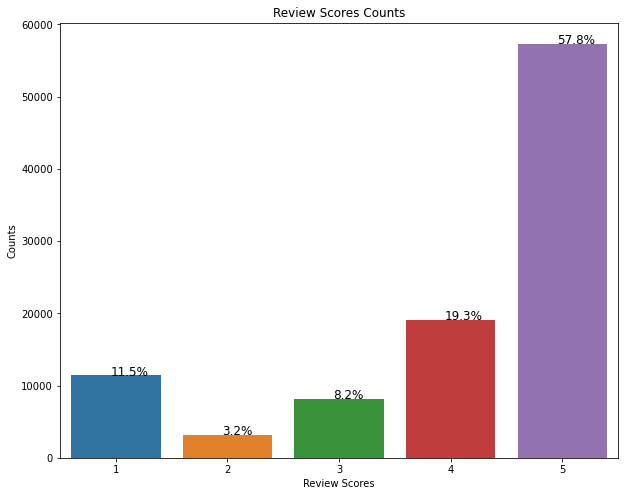

In [46]:
# ref - https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn

plt.figure(figsize=(10,8))
ax=sns.countplot(x=order_reviews_dataset.review_score)
plt.xlabel('Review Scores')
plt.ylabel('Counts')
plt.title('Review Scores Counts')

total = len(order_reviews_dataset.review_score)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)


plt.show()

More than 50 percent of customers have reviewed positively. We can see that the data is imbalanced and is concentrated around
positive reviews.

### 7) products_dataset

In [47]:
products_dataset.head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [48]:
products_dataset.shape

(32951, 9)

In [49]:
# # renaming the misspelled columns
# products_dataset.rename(columns={'product_name_lenght':'product_name_length'},inplace=True)
# products_dataset.rename(columns={'product_description_lenght':'product_description_length'},inplace=True)

In [50]:
## Checking for null values
products_dataset.isnull().sum()

product_id                      0
product_category_name         610
product_name_length           610
product_description_length    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

The null values are less compared to the data size so we can remove those rows

In [51]:
print('Number of unique product categories = ', products_dataset.product_category_name.nunique())

Number of unique product categories =  73


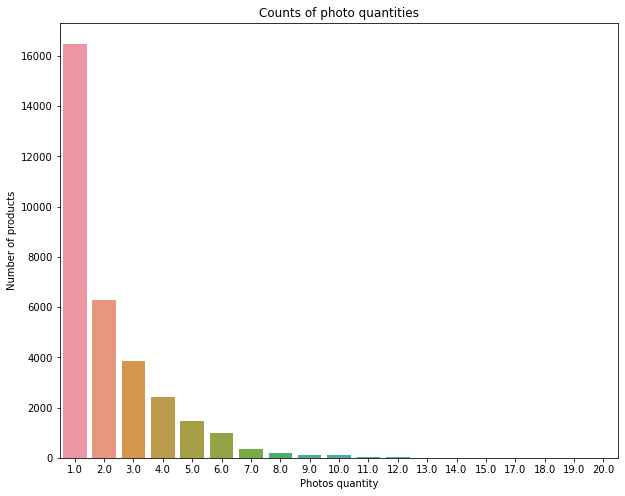

In [52]:
plt.figure(figsize=(10,8))
ax=sns.countplot(x=products_dataset.product_photos_qty)
plt.xlabel('Photos quantity')
plt.ylabel('Number of products')
plt.title('Counts of photo quantities')
plt.show()

More than 50 percent products have one photo

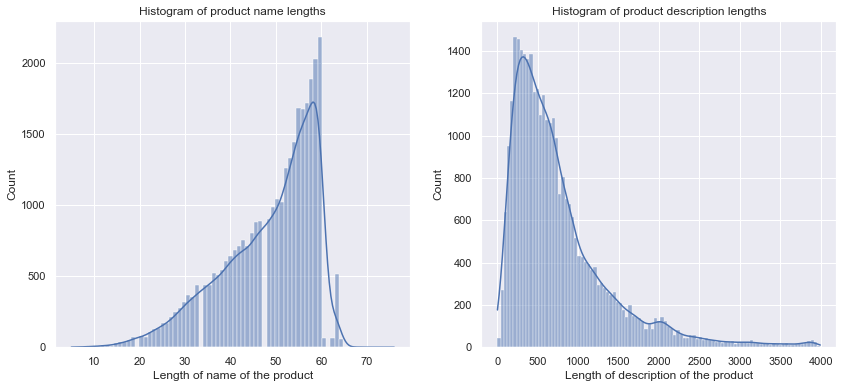

In [53]:
plt.figure(figsize=(14,6))
sns.set_theme()

plt.subplot(1,2,1)
sns.histplot(x=products_dataset.product_name_length,kde=True)
plt.xlabel('Length of name of the product')
plt.title('Histogram of product name lengths')

plt.subplot(1,2,2)
sns.histplot(x=products_dataset.product_description_length,kde=True)
plt.xlabel('Length of description of the product')
plt.title('Histogram of product description lengths')

plt.show()

The length of the names of the products lies mostly in range 50 to 60.The product name length histogram is left skewed.It means it has lesser counts of names having length less than 50. 
The length of the description of the producs lies mostly in range 250 to 1000. The product description length histogram is right skewed.It means it has lesser products having description length more than 1000.

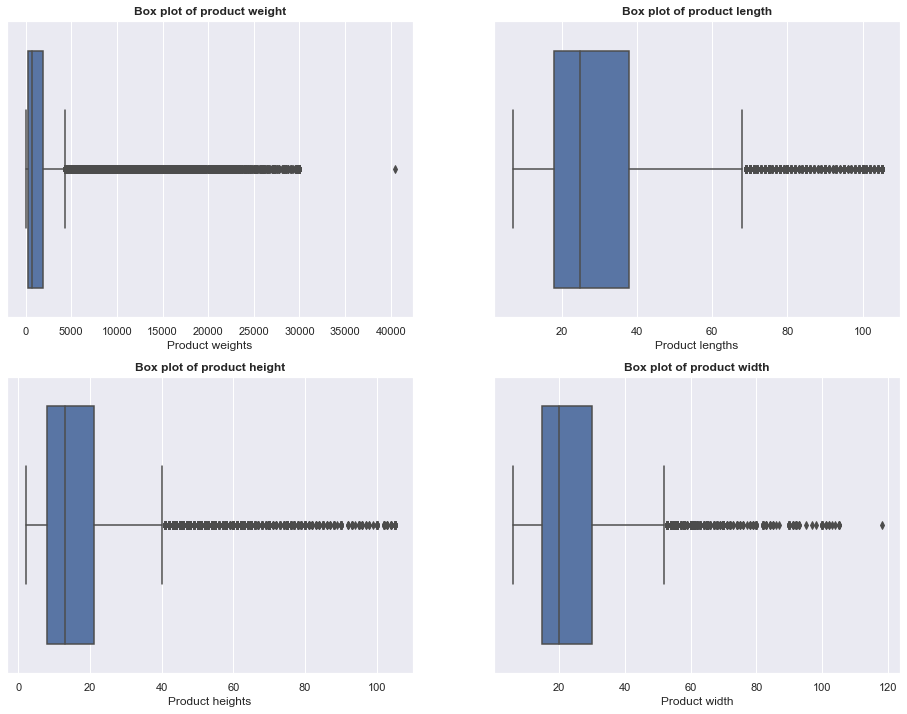

In [54]:
plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
sns.boxplot(x=products_dataset.product_weight_g)
plt.title('Box plot of product weight',fontweight='bold')
plt.xlabel('Product weights')

plt.subplot(2,2,2)
sns.boxplot(x=products_dataset.product_length_cm)
plt.title('Box plot of product length',fontweight='bold')
plt.xlabel('Product lengths')

plt.subplot(2,2,3)
sns.boxplot(x=products_dataset.product_height_cm)
plt.title('Box plot of product height',fontweight='bold')
plt.xlabel('Product heights')

plt.subplot(2,2,4)
sns.boxplot(x=products_dataset.product_width_cm)
plt.title('Box plot of product width',fontweight='bold')
plt.xlabel('Product width')

plt.show()

All the 4 plots are rightly skewed and there is heavy presence of outliers in all the data

### 8) sellers_dataset

In [55]:
sellers_dataset.head()

,seller_id,zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [56]:
sellers_dataset.shape

(3095, 4)

In [57]:
sellers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   seller_id        3095 non-null   object
 1   zip_code_prefix  3095 non-null   int64 
 2   seller_city      3095 non-null   object
 3   seller_state     3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [58]:
# checking for null values
sellers_dataset.isnull().sum()

seller_id          0
zip_code_prefix    0
seller_city        0
seller_state       0
dtype: int64

In [59]:
print('Number of unique seller states = ', sellers_dataset.seller_state.nunique())

Number of unique seller states =  23


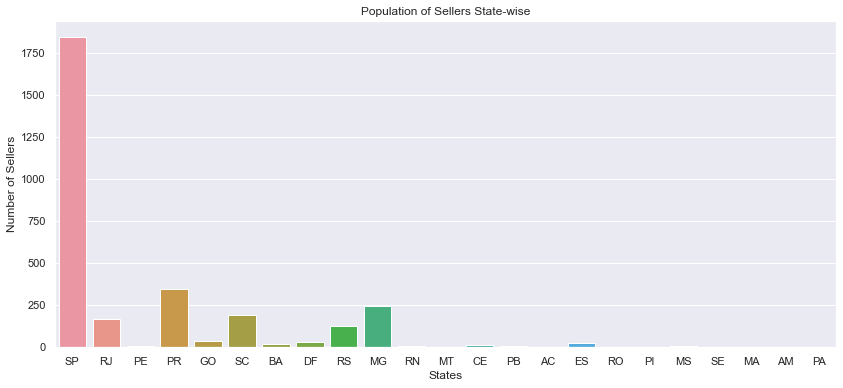

In [60]:
plt.figure(figsize=(14,6))
ax=sns.countplot(x=sellers_dataset.seller_state)
plt.xlabel('States')
plt.ylabel('Number of Sellers')
plt.title('Population of Sellers State-wise')
plt.show()

In [61]:
print('Percentage of sellers from state "SP" = ',len(sellers_dataset[sellers_dataset['seller_state']=='SP'])/sellers_dataset.shape[0]*100)

Percentage of sellers from state "SP" =  59.741518578352185


About 60 percent of the sellers are from state 'SP'

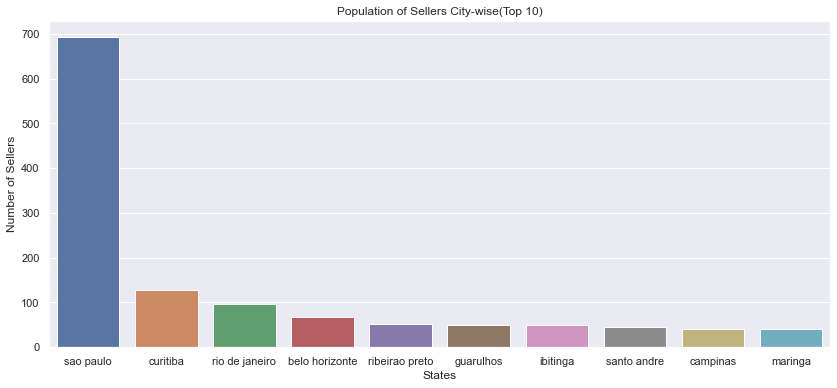

In [62]:
plt.figure(figsize=(14,6))
ax=sns.countplot(x=sellers_dataset.seller_city,order=sellers_dataset.seller_city.value_counts().iloc[:10].index)
plt.xlabel('States')
plt.ylabel('Number of Sellers')
plt.title('Population of Sellers City-wise(Top 10)')
plt.show()

Most of the sellers live in city 'sao paulo' which is in state 'SP'

### 9) product_category_name_translation

In [63]:
product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [64]:
product_category_name_translation.shape

(71, 2)

In [65]:
product_category_name_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [66]:
product_category_name_translation.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,la_cuisine,luggage_accessories
freq,1,1


We have unique categories 73 but here English translation of only 71 categories are given

In [67]:
print('The 2 product categories that are not translated are = ',list(set(products_dataset.product_category_name.unique()).difference(set(product_category_name_translation.product_category_name.unique())))[1:])

The 2 product categories that are not translated are =  ['pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos']


### Merging all the 9 tables into one

In [68]:
merged_df=pd.merge(left=orders_dataset,right=customers_dataset,how='inner',left_on='customer_id',right_on='customer_id')
merged_df=pd.merge(left=merged_df,right=order_items_dataset,how='inner',left_on='order_id',right_on='order_id')
merged_df=pd.merge(left=merged_df,right=products_dataset,how='inner', left_on='product_id',right_on='product_id')
merged_df=pd.merge(left=merged_df,right=product_category_name_translation,how='inner',left_on='product_category_name',right_on=
                  'product_category_name')
merged_df=pd.merge(left=merged_df,right=order_payments_dataset,how='inner',left_on='order_id',right_on='order_id')
merged_df=pd.merge(left=merged_df,right=order_reviews_dataset,how='inner',left_on='order_id',right_on='order_id')
merged_df=pd.merge(left=merged_df,right=sellers_dataset,how='inner',left_on='seller_id',right_on='seller_id')

In [69]:
# to show the all the columns
pd.options.display.max_columns = None

In [70]:
merged_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,zip_code_prefix_x,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,zip_code_prefix_y,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,credit_card,1,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,3,voucher,1,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,2,voucher,1,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,credit_card,3,37.77,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,9350,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,credit_card,1,37.77,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,9350,maua,SP


# 2) Preprocessing

In [71]:
merged_df.shape

(115609, 40)

#### Dropping of features
1) We will be removing all the ids except customer_unique_id, seller_id and product _id as they can help in understand the customer behaviour , seller's and product's popularity

2) We will also be removing order_approved_at because it doesn't affect customer rating

3) We will only be considering the orders which have have order status as delivered and then removing the order status column as well

4) We will be removing product_category_name which is in Portugese as we have product_category_name_english in English

5) product_length_cm, product_weight_g, product_height_cm, product_width_cm are not important features as they are not useful in predicting review where as product_photos_quantity and product_description_length are important as they help in choosing the right product customer is looking for

6) review_comment_title and review_comment_message have more than 50% null values, so we cannot do imputation here , we will be dropping these features

7) review_creation_date and review_answer_timestamp	are useless features which will be dropped

8) We will be converting this multiclass problem into binary class problem by converting all the reviews<=3 to 0(negative reviews) and reviews>3 to 1(positive reviews)

9) We will be renaming zip_code_prefix_x to customer_zip_code and zip_code_prefix_y to seller_zip_code

In [72]:
(merged_df['zip_code_prefix_x']==merged_df['zip_code_prefix_y']).sum()

25

Only 25 zipcodes are common between Customers and Sellers, so we cannot use this feature as it will increase dimensionality

In [73]:
(merged_df['customer_state']==merged_df['seller_state']).sum()

41751

40882 states are same between customers and sellers

In [74]:
(merged_df['customer_city']==merged_df['seller_city']).sum()

5973

5839 cities are same for customers and sellers

In [75]:
# keeping only the delivered order statuses
merged_df=merged_df[merged_df['order_status']=='delivered']

In [76]:
merged_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'zip_code_prefix_x', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'zip_code_prefix_y',
       'seller_city', 'seller_state'],
      dtype='object')

In [77]:
features_to_be_dropped=['order_id','customer_id','order_status','order_approved_at','order_item_id','product_category_name',
                        'product_weight_g','product_length_cm','product_height_cm','product_width_cm','review_id',
                        'review_comment_title','review_comment_message','review_creation_date','review_answer_timestamp',
                        'zip_code_prefix_x','zip_code_prefix_y','shipping_limit_date']

In [78]:
merged_df=merged_df.drop(features_to_be_dropped,axis=1)
print('Total number of features dropped = ', len(features_to_be_dropped))

Total number of features dropped =  18


In [79]:
# Renaming the columns
merged_df.rename(columns={'product_category_name_english':'product_category_name'},inplace=True)

In [80]:
# removing null values
merged_df.dropna(inplace=True)

In [81]:
# converting to binary class labels
merged_df['review_score']=merged_df['review_score'].apply(lambda x: 0 if x<4 else 1)

In [82]:
merged_df.head()

,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,product_id,seller_id,price,freight_value,product_name_length,product_description_length,product_photos_qty,product_category_name,payment_sequential,payment_type,payment_installments,payment_value,review_score,seller_city,seller_state
0,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,40.0,268.0,4.0,housewares,1,credit_card,1,18.12,1,maua,SP
1,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,40.0,268.0,4.0,housewares,3,voucher,1,2.00,1,maua,SP
2,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,40.0,268.0,4.0,housewares,2,voucher,1,18.59,1,maua,SP
3,2017-08-15 18:29:31,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,40.0,268.0,4.0,housewares,1,credit_card,3,37.77,1,maua,SP
4,2017-08-02 18:24:47,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,40.0,268.0,4.0,housewares,1,credit_card,1,37.77,1,maua,SP


In [83]:
# converting objects to date values , we only need the date not the time
merged_df['order_purchase_timestamp']=pd.to_datetime(merged_df['order_purchase_timestamp'])
merged_df['order_delivered_carrier_date']=pd.to_datetime(merged_df['order_delivered_carrier_date'])
merged_df['order_delivered_customer_date']=pd.to_datetime(merged_df['order_delivered_customer_date'])
merged_df['order_estimated_delivery_date']=pd.to_datetime(merged_df['order_estimated_delivery_date'])

In [84]:
merged_df.head()

,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,product_id,seller_id,price,freight_value,product_name_length,product_description_length,product_photos_qty,product_category_name,payment_sequential,payment_type,payment_installments,payment_value,review_score,seller_city,seller_state
0,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,40.0,268.0,4.0,housewares,1,credit_card,1,18.12,1,maua,SP
1,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,40.0,268.0,4.0,housewares,3,voucher,1,2.00,1,maua,SP
2,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,40.0,268.0,4.0,housewares,2,voucher,1,18.59,1,maua,SP
3,2017-08-15 18:29:31,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,3a51803cc0d012c3b5dc8b7528cb05f7,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,40.0,268.0,4.0,housewares,1,credit_card,3,37.77,1,maua,SP
4,2017-08-02 18:24:47,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,ef0996a1a279c26e7ecbd737be23d235,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,40.0,268.0,4.0,housewares,1,credit_card,1,37.77,1,maua,SP


In [85]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113201 entries, 0 to 115608
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_purchase_timestamp       113201 non-null  datetime64[ns]
 1   order_delivered_carrier_date   113201 non-null  datetime64[ns]
 2   order_delivered_customer_date  113201 non-null  datetime64[ns]
 3   order_estimated_delivery_date  113201 non-null  datetime64[ns]
 4   customer_unique_id             113201 non-null  object        
 5   customer_city                  113201 non-null  object        
 6   customer_state                 113201 non-null  object        
 7   product_id                     113201 non-null  object        
 8   seller_id                      113201 non-null  object        
 9   price                          113201 non-null  float64       
 10  freight_value                  113201 non-null  float64       
 11  

### Multivariate Analysis

#### Visualising PCA

In [90]:
# ref - https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [91]:
# Standardizing the numerical features for PCA
num_feat=['price','freight_value','product_name_length','product_description_length', 'product_photos_qty','payment_value']

X=merged_df.loc[:,num_feat].values
y=merged_df.loc[:,'review_score'].values

x=StandardScaler().fit_transform(X)

# PCA

pca=PCA(n_components=2)

principal_comp=pca.fit_transform(x)

pca_df=pd.DataFrame(data=principal_comp,columns=['principal component 1','principal component 2'])
pca_df=pd.concat([pca_df,merged_df[['review_score']]],axis=1,join='inner')

pca_df.head()

,principal component 1,principal component 2,review_score
0,-1.134909,-0.000467,1
1,-1.171155,-0.009099,1
2,-1.133852,-0.000215,1
3,-1.117694,0.004031,1
4,-1.117694,0.004031,1


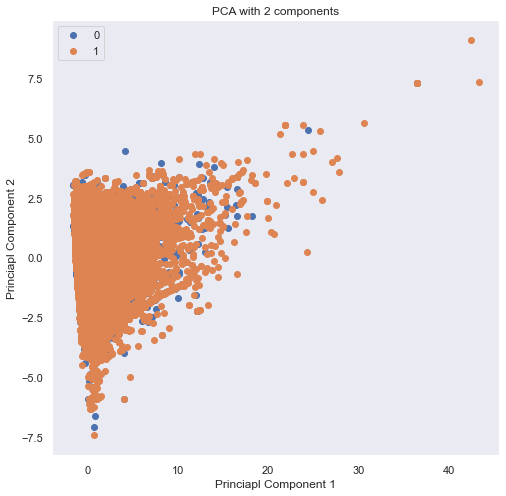

In [92]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Princiapl Component 1')
ax.set_ylabel('Princiapl Component 2')
ax.set_title('PCA with 2 components')

targets=[0,1]
colors=['r','g']

for target,color in zip(targets,colors):
    indices=pca_df['review_score']==target
    ax.scatter(pca_df.loc[indices,'principal component 1'],pca_df.loc[indices,'principal component 2'])
ax.legend(targets)
ax.grid()

We can see even by projecting the data into a two dimesional space , it is difficult to separate it , the data is highly overlapped.2 principal components do not hold enough information to set the data apart.

#### Visualising TSNE

In [93]:
tsne=TSNE(n_components=2,verbose=1,perplexity=40,n_iter=300)
tsne_results= tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 113201 samples in 0.535s...
[t-SNE] Computed neighbors for 113201 samples in 7.615s...
[t-SNE] Computed conditional probabilities for sample 1000 / 113201
[t-SNE] Computed conditional probabilities for sample 2000 / 113201
[t-SNE] Computed conditional probabilities for sample 3000 / 113201
[t-SNE] Computed conditional probabilities for sample 4000 / 113201
[t-SNE] Computed conditional probabilities for sample 5000 / 113201
[t-SNE] Computed conditional probabilities for sample 6000 / 113201
[t-SNE] Computed conditional probabilities for sample 7000 / 113201
[t-SNE] Computed conditional probabilities for sample 8000 / 113201
[t-SNE] Computed conditional probabilities for sample 9000 / 113201
[t-SNE] Computed conditional probabilities for sample 10000 / 113201
[t-SNE] Computed conditional probabilities for sample 11000 / 113201
[t-SNE] Computed conditional probabilities for sample 12000 / 113201
[t-SNE] Computed conditional probab

In [94]:
tsne_df=pd.DataFrame()
tsne_df['tsne_x']=tsne_results[:,0]
tsne_df['tsne_y']=tsne_results[:,1]
tsne_df['labels']=y

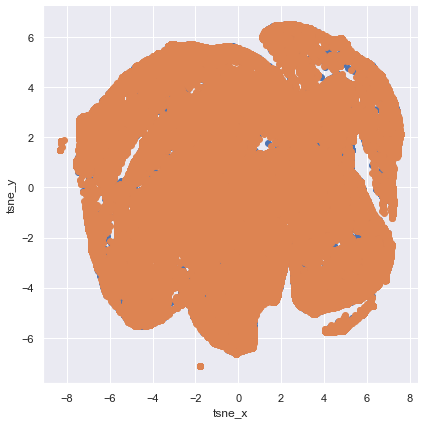

In [95]:
sns.FacetGrid(tsne_df,hue='labels',height=6).map(plt.scatter,'tsne_x','tsne_y')
plt.show()

The dataset is very much overlapped and TSNE cannot separate the data propely even with different perplexities

#### Box Plots

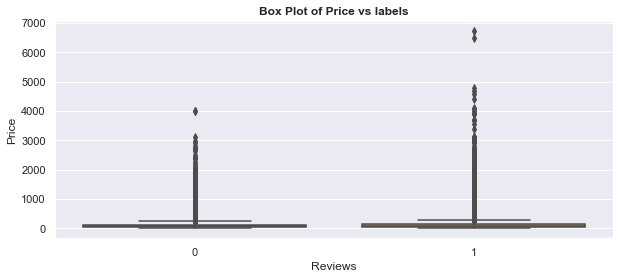

+-------------+--------+-------------------+
| Precentiles |   0    |         1         |
+-------------+--------+-------------------+
|      25     |  39.9  |        39.9       |
|      50     |  71.9  |       74.99       |
|      75     | 129.9  |       134.9       |
|      95     | 330.0  |       349.9       |
|      99     | 898.0  | 878.3399999999965 |
|     100     | 3999.0 |       6735.0      |
+-------------+--------+-------------------+


In [96]:
## Price 

plt.figure(figsize=(10,4))
sns.boxplot(x=merged_df['review_score'],y=merged_df['price'],data=merged_df)
plt.title('Box Plot of Price vs labels',fontweight= 'bold')
plt.xlabel('Reviews')
plt.ylabel('Price')
plt.show()

table=PrettyTable(['Precentiles',0,1])
table.add_row([25,np.percentile(merged_df[merged_df['review_score']==0]['price'],25),np.percentile(merged_df[merged_df['review_score']==1]['price'],25)])
table.add_row([50,np.percentile(merged_df[merged_df['review_score']==0]['price'],50),np.percentile(merged_df[merged_df['review_score']==1]['price'],50)])
table.add_row([75,np.percentile(merged_df[merged_df['review_score']==0]['price'],75),np.percentile(merged_df[merged_df['review_score']==1]['price'],75)])
table.add_row([95,np.percentile(merged_df[merged_df['review_score']==0]['price'],95),np.percentile(merged_df[merged_df['review_score']==1]['price'],95)])
table.add_row([99,np.percentile(merged_df[merged_df['review_score']==0]['price'],99),np.percentile(merged_df[merged_df['review_score']==1]['price'],99)])
table.add_row([100,np.percentile(merged_df[merged_df['review_score']==0]['price'],100),np.percentile(merged_df[merged_df['review_score']==1]['price'],100)])
print(table)

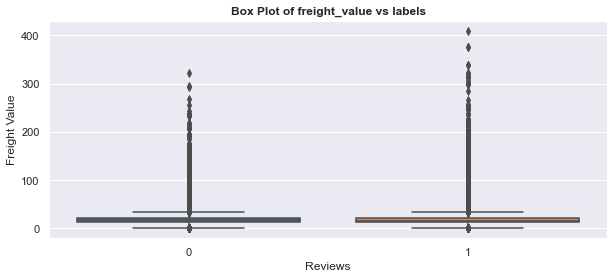

+-------------+-------------------+--------+
| Precentiles |         0         |   1    |
+-------------+-------------------+--------+
|      25     |       13.58       | 12.93  |
|      50     |       16.79       | 16.18  |
|      75     |       22.13       | 20.99  |
|      95     | 48.69049999999996 | 44.64  |
|      99     |       88.57       | 82.86  |
|     100     |       321.88      | 409.68 |
+-------------+-------------------+--------+


In [97]:
## freight_value

plt.figure(figsize=(10,4))
sns.boxplot(x=merged_df.review_score,y=merged_df.freight_value)
plt.title('Box Plot of freight_value vs labels',fontweight= 'bold')
plt.xlabel('Reviews')
plt.ylabel('Freight Value')
plt.show()

table=PrettyTable(['Precentiles',0,1])
table.add_row([25,np.percentile(merged_df[merged_df['review_score']==0]['freight_value'],25),np.percentile(merged_df[merged_df['review_score']==1]['freight_value'],25)])
table.add_row([50,np.percentile(merged_df[merged_df['review_score']==0]['freight_value'],50),np.percentile(merged_df[merged_df['review_score']==1]['freight_value'],50)])
table.add_row([75,np.percentile(merged_df[merged_df['review_score']==0]['freight_value'],75),np.percentile(merged_df[merged_df['review_score']==1]['freight_value'],75)])
table.add_row([95,np.percentile(merged_df[merged_df['review_score']==0]['freight_value'],95),np.percentile(merged_df[merged_df['review_score']==1]['freight_value'],95)])
table.add_row([99,np.percentile(merged_df[merged_df['review_score']==0]['freight_value'],99),np.percentile(merged_df[merged_df['review_score']==1]['freight_value'],99)])
table.add_row([100,np.percentile(merged_df[merged_df['review_score']==0]['freight_value'],100),np.percentile(merged_df[merged_df['review_score']==1]['freight_value'],100)])
print(table)

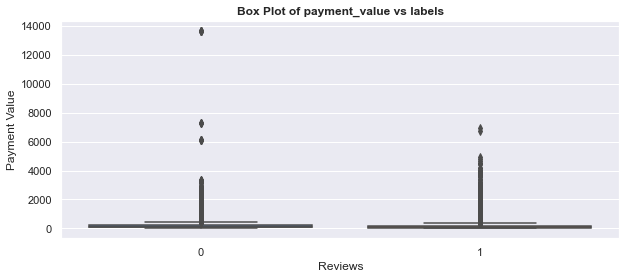

+-------------+----------+--------------------+
| Precentiles |    0     |         1          |
+-------------+----------+--------------------+
|      25     |  66.89   |       58.74        |
|      50     |  123.18  |       104.38       |
|      75     |  218.22  |       180.36       |
|      95     |  623.18  | 470.53499999999985 |
|      99     | 1482.24  | 1095.9083999999975 |
|     100     | 13664.08 |      6929.31       |
+-------------+----------+--------------------+


In [98]:
## payment_value

plt.figure(figsize=(10,4))
sns.boxplot(x=merged_df.review_score,y=merged_df.payment_value)
plt.title('Box Plot of payment_value vs labels',fontweight= 'bold')
plt.xlabel('Reviews')
plt.ylabel('Payment Value')
plt.show()

table=PrettyTable(['Precentiles',0,1])
table.add_row([25,np.percentile(merged_df[merged_df['review_score']==0]['payment_value'],25),np.percentile(merged_df[merged_df['review_score']==1]['payment_value'],25)])
table.add_row([50,np.percentile(merged_df[merged_df['review_score']==0]['payment_value'],50),np.percentile(merged_df[merged_df['review_score']==1]['payment_value'],50)])
table.add_row([75,np.percentile(merged_df[merged_df['review_score']==0]['payment_value'],75),np.percentile(merged_df[merged_df['review_score']==1]['payment_value'],75)])
table.add_row([95,np.percentile(merged_df[merged_df['review_score']==0]['payment_value'],95),np.percentile(merged_df[merged_df['review_score']==1]['payment_value'],95)])
table.add_row([99,np.percentile(merged_df[merged_df['review_score']==0]['payment_value'],99),np.percentile(merged_df[merged_df['review_score']==1]['payment_value'],99)])
table.add_row([100,np.percentile(merged_df[merged_df['review_score']==0]['payment_value'],100),np.percentile(merged_df[merged_df['review_score']==1]['payment_value'],100)])
print(table)

Text(0, 0.5, 'Product Description Length')

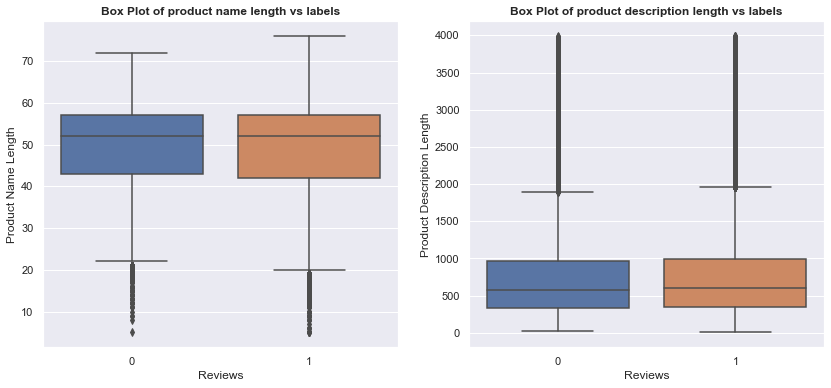

In [99]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.boxplot(x=merged_df.review_score,y=merged_df.product_name_length)
plt.title('Box Plot of product name length vs labels',fontweight= 'bold')
plt.xlabel('Reviews')
plt.ylabel('Product Name Length')

plt.subplot(1,2,2)
sns.boxplot(x=merged_df.review_score,y=merged_df.product_description_length)
plt.title('Box Plot of product description length vs labels',fontweight= 'bold')
plt.xlabel('Reviews')
plt.ylabel('Product Description Length')

Observations:- 

-  There is high presence of outliers in the dataset as can be seen in the above box plots
- In price and freight_value , data with review_score as 1 are more right skewed
- product_name_length is left skewed with median close to 50
- The distribution of product_description_lenght is of both the class labels are almost same

Text(0.5, 1.0, 'Monthwise Revenue in terms of  Price and Freight_value')

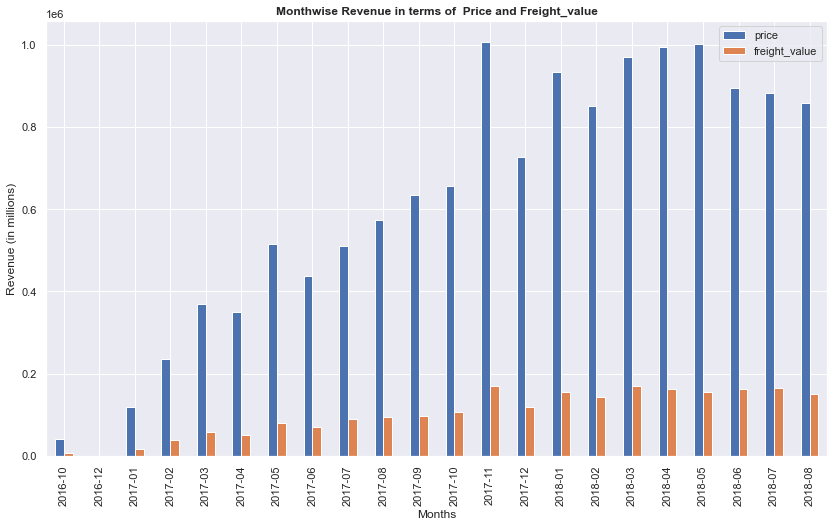

In [100]:
# ref- https://sparkbyexamples.com/pandas/pandas-groupby-count-examples/#:~:text=Use%20count()%20by%20Column,ignoring%20None%20and%20Nan%20values.

merged_df.groupby(merged_df['order_purchase_timestamp'].dt.to_period('M'))[['price','freight_value']].sum().plot(kind='bar',figsize=(14,8))
plt.xlabel('Months')
plt.ylabel('Revenue (in millions)')
plt.title('Monthwise Revenue in terms of  Price and Freight_value',fontweight='bold')

We can see that the most revenue regarding with the price value was in 11-2017(November) followed by 05-2018(May) and 04-2018(April) and in terms of freight value , it was maximum in 03-2018(March) followed by 11-2017(November) and 07-2018(July)

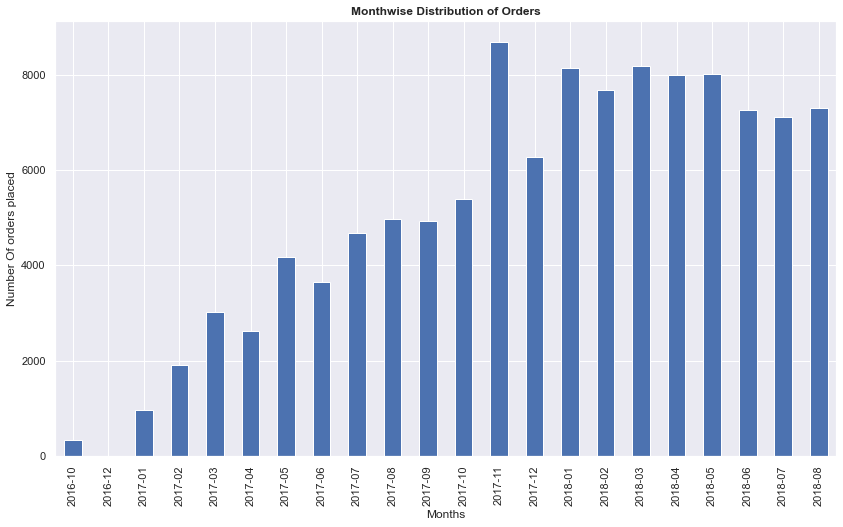

In [101]:
sns.set_style('darkgrid')
merged_df.groupby(merged_df['order_purchase_timestamp'].dt.to_period('M'))[['order_purchase_timestamp']].count().plot(kind='bar',figsize=(14,8),legend=False)
plt.xlabel('Months')
plt.ylabel('Number Of orders placed')
plt.title('Monthwise Distribution of Orders',fontweight='bold')
plt.show()

Maximum number of orders were placed in 11-2017(November) followed by 03-2018(March) and 01-2018(January).

Text(0.5, 1.0, 'Top 10 Cities Revenue wise')

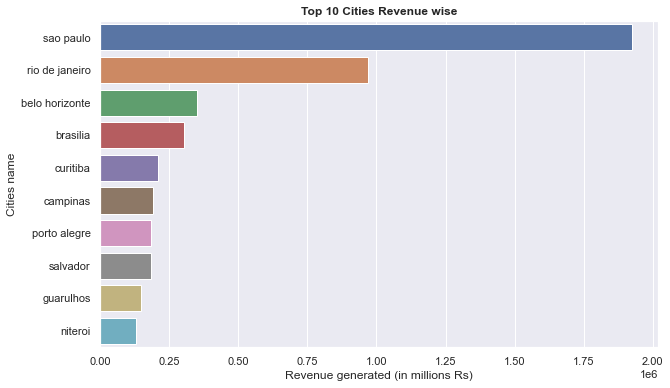

In [102]:
plt.figure(figsize=(10,6))
df=merged_df.groupby(merged_df['customer_city'])['price'].sum().sort_values(ascending=False)[:10]
sns.barplot(y=df.index,x=df.values)
plt.xlabel('Revenue generated (in millions Rs)')
plt.ylabel('Cities name')
plt.title('Top 10 Cities Revenue wise',fontweight='bold')

Most of the revenue was generated by Sao Paulo which is also the most populated city followed by rio de janeiro.

Text(0.5, 1.0, 'Top 10 Product selling categories')

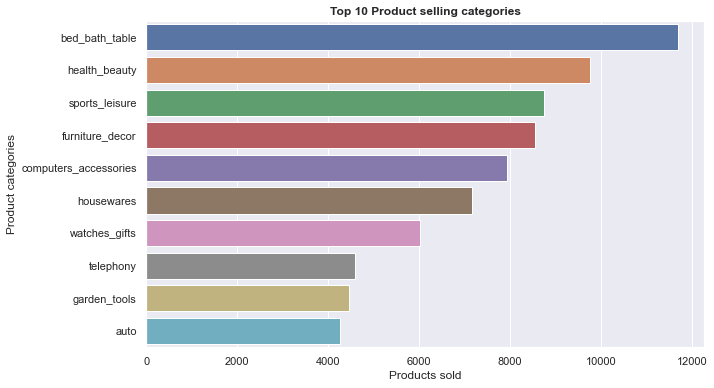

In [103]:
plt.figure(figsize=(10,6))
df=merged_df.groupby(merged_df['product_category_name'])['product_category_name'].count().sort_values(ascending=False)[:10]
sns.barplot(y=df.index,x=df.values)
plt.xlabel('Products sold')
plt.ylabel('Product categories')
plt.title('Top 10 Product selling categories',fontweight='bold')

The most products sold were from the categoy bed_bath_table followed by health_beauty and then sports_leisure. It tells us the preference of customers.

Text(0.5, 1.0, 'Top 10 Revenue generating categories ')

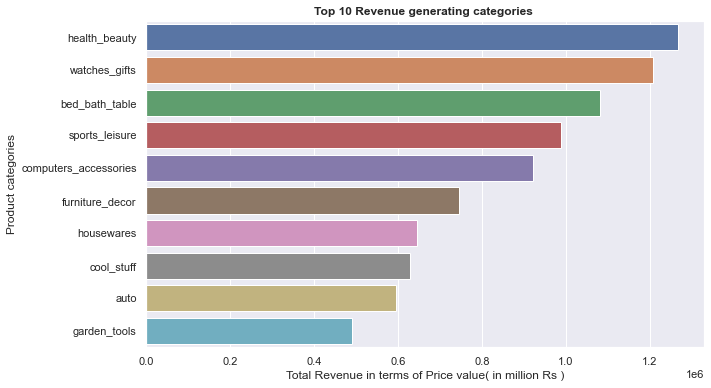

In [104]:
plt.figure(figsize=(10,6))
df=merged_df.groupby(merged_df['product_category_name'])['price'].sum().sort_values(ascending=False)[:10]
sns.barplot(y=df.index,x=df.values)
plt.xlabel('Total Revenue in terms of Price value( in million Rs )')
plt.ylabel('Product categories')
plt.title('Top 10 Revenue generating categories ', fontweight='bold')

Most products were sold from bed_bath_table category but most revenue was generated by health_beauty products, which was number 2 on selling,and then watches_gifts made the 2nd most revenue because this category has more expensive products

Text(0.5, 1.0, 'Top 20 categories that got Bad review (Count-wise)')

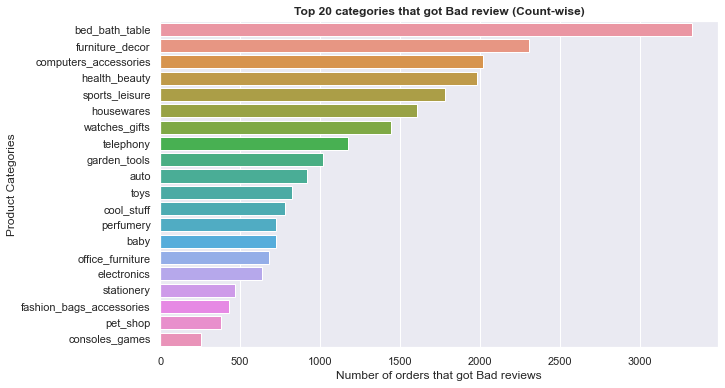

In [105]:
plt.figure(figsize=(10,6))
df=merged_df[merged_df['review_score']==0].groupby(merged_df.product_category_name)['review_score'].count().reset_index().sort_values('review_score',ascending=False)[:20]
sns.barplot(x=df['review_score'],y=df['product_category_name'])
plt.xlabel('Number of orders that got Bad reviews')
plt.ylabel('Product Categories')
plt.title('Top 20 categories that got Bad review (Count-wise)', fontweight='bold')

From the above graph, the most number of bad reviews were given to bed_bath_table and furniture_decor

Text(0.5, 1.0, 'Top 20 categories that got Bad review (Percent-wise)')

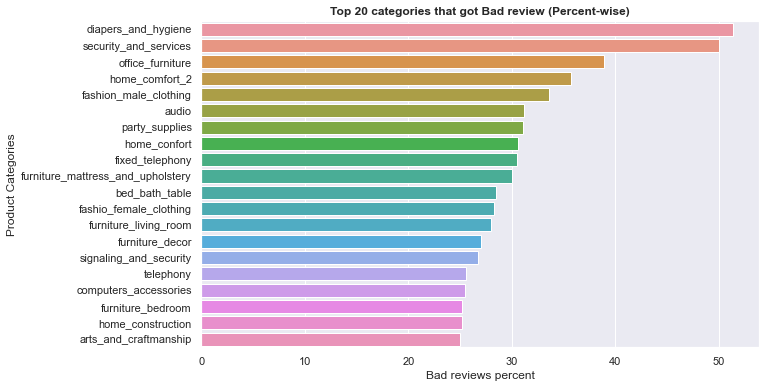

In [106]:
df=merged_df.groupby(by=[merged_df.product_category_name,merged_df.review_score])['review_score'].count().unstack('review_score').reset_index()
df['total']=df[0]+df[1]
df['bad_review_percent']=df[0]/df['total']*100
df=df.sort_values('bad_review_percent',ascending=False)[:20]


plt.figure(figsize=(10,6))
sns.barplot(x=df['bad_review_percent'],y=df['product_category_name'])
plt.xlabel('Bad reviews percent')
plt.ylabel('Product Categories')
plt.title('Top 20 categories that got Bad review (Percent-wise)', fontweight='bold')

Percentage wise,diapers_and_hygiene and security_and_services categories got the most bad reviews which is about 50 percent

Text(0.5, 1.0, 'Top 10 sellers (Product Sales wise) ')

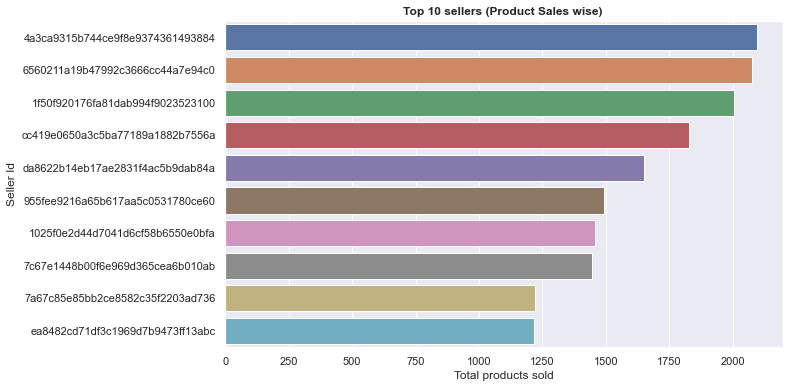

In [107]:
plt.figure(figsize=(10,6))
df=merged_df.groupby(merged_df['seller_id'])['price'].count().sort_values(ascending=False)[:10].reset_index(name='count')
sns.barplot(x=df['count'],y=df['seller_id'])
plt.xlabel('Total products sold')
plt.ylabel('Seller Id')
plt.title('Top 10 sellers (Product Sales wise) ', fontweight='bold')

Text(0.5, 1.0, 'Top 10 sellers (Product Revenue wise) ')

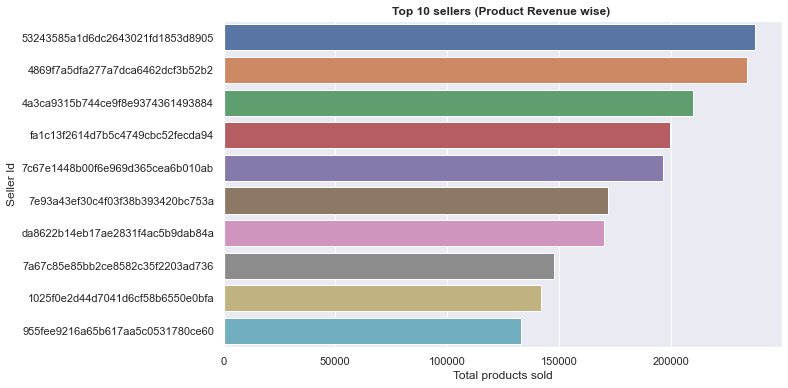

In [108]:
plt.figure(figsize=(10,6))
df=merged_df.groupby(merged_df['seller_id'])['price'].sum().sort_values(ascending=False)[:10].reset_index(name='count')
sns.barplot(x=df['count'],y=df['seller_id'])
plt.xlabel('Total products sold')
plt.ylabel('Seller Id')
plt.title('Top 10 sellers (Product Revenue wise) ', fontweight='bold')

Text(0.5, 1.0, 'Top 10 sellers that got most positive reviews ')

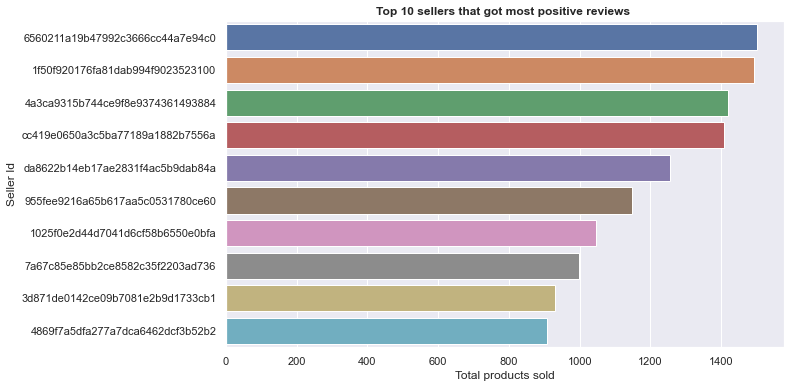

In [109]:
plt.figure(figsize=(10,6))
df=merged_df[merged_df['review_score']==1].groupby(merged_df['seller_id'])['review_score'].sum().sort_values(ascending=False)[:10].reset_index(name='count')
sns.barplot(x=df['count'],y=df['seller_id'])
plt.xlabel('Total products sold')
plt.ylabel('Seller Id')
plt.title('Top 10 sellers that got most positive reviews ', fontweight='bold')

Text(0.5, 1.0, 'Heatmap of correlated features')

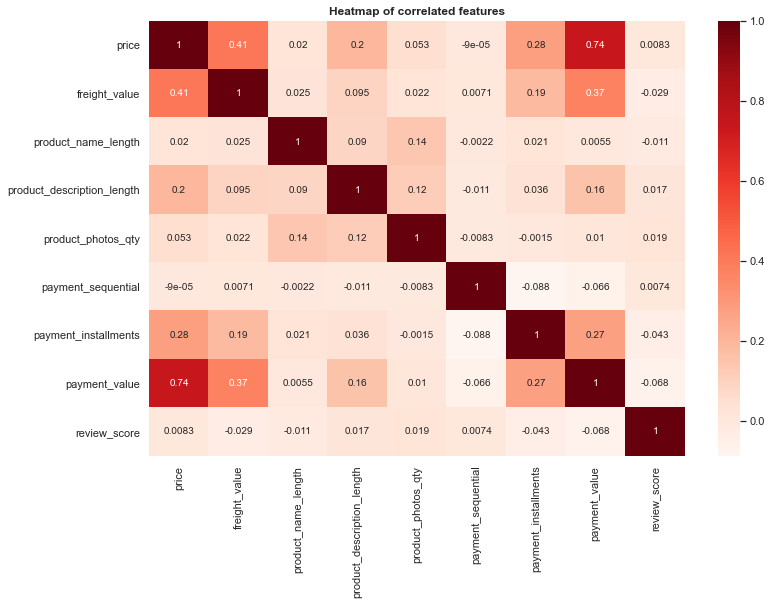

In [110]:
plt.figure(figsize=(12,8))
sns.heatmap(merged_df.corr(),annot=True,cmap=plt.cm.Reds)
plt.title('Heatmap of correlated features',fontweight='bold')

From the above heatmap, we can conclude that the most correlation is between payment_value and price, it is also logically correct as the more expensive the product is , the more will be the transaction value on it and hence more payment_value. All the other features are not significantly related

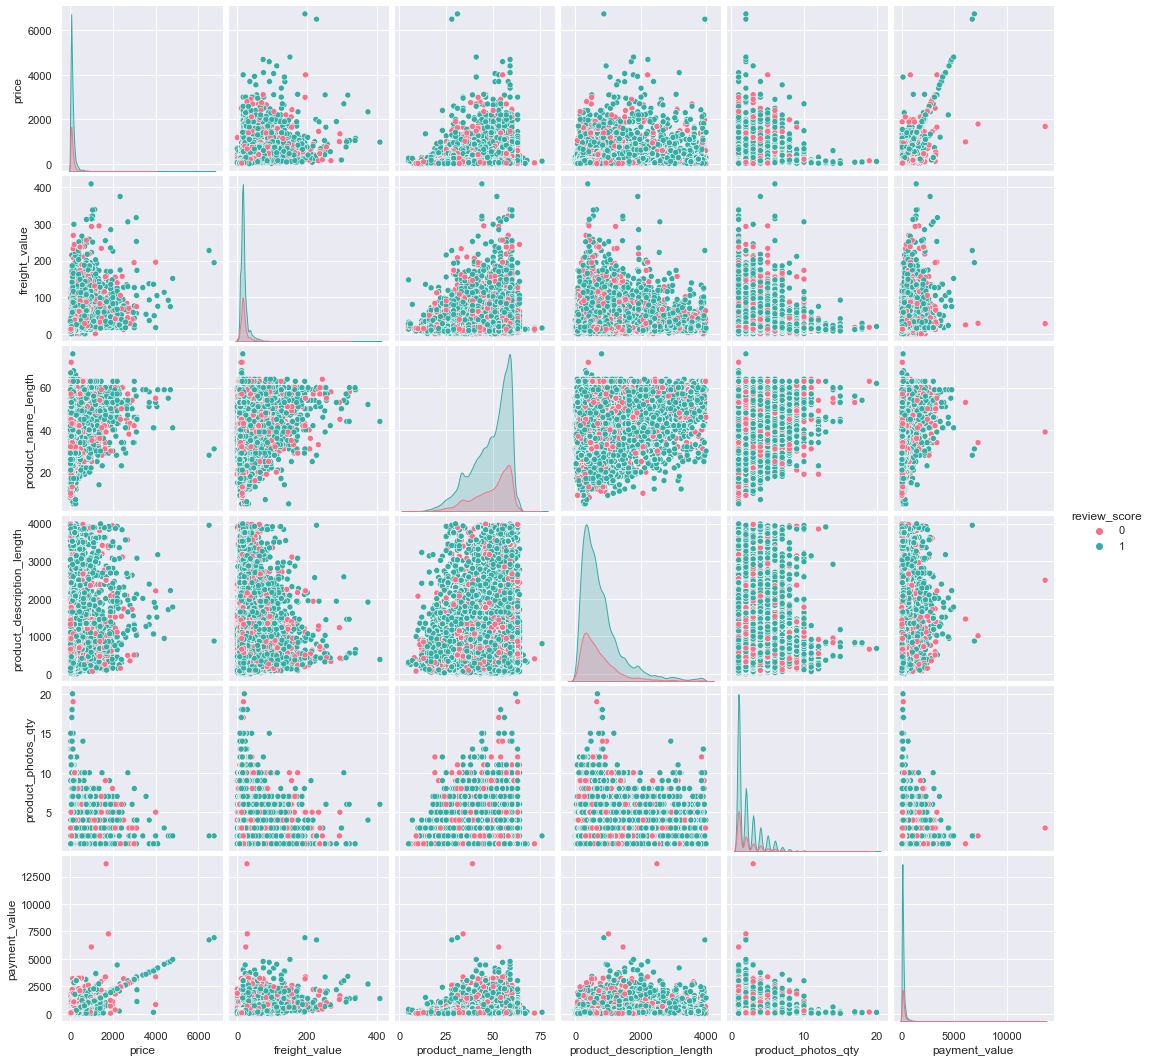

In [111]:
df=merged_df[['price','freight_value','product_name_length','product_description_length','product_photos_qty','payment_value','review_score']]

sns.pairplot(df,hue='review_score',palette='husl')

We can see from the above paiplots, that the features are not linearly seperable, product_name_length and product_description length can be separated to some extent by feature transformation.

# 3) Feature Engineering

In [117]:
# Adding column actual_delivery_days which will tell how many days it actuall took for the delivery

merged_df['actual_delivery_days']=(merged_df['order_delivered_customer_date']-merged_df['order_purchase_timestamp']).dt.days

In [118]:
# Adding column estimated_delivery_days which will tell how manys days the delivery was estimated to be

merged_df['estimated_delivery_days']=(merged_df['order_estimated_delivery_date']-merged_df['order_purchase_timestamp']).dt.days

In [119]:
# Adding column delivery_accuracy which will tell how many days was the delivery late or early from the estimated delivery

merged_df['delivery_accuracy']=merged_df['estimated_delivery_days']-merged_df['actual_delivery_days']

In [120]:
# Adding column late_delivery which is a binary column and will tell if the delivery was late or not from the estimated time

merged_df['late_delivery']=np.where(merged_df['delivery_accuracy']<0,1,0)

In [121]:
# Adding column seller_popularity column, based on the number of products every sellers has sold
# This idea is take from Kaggle competition

seller_id_popularity=merged_df['seller_id'].value_counts().to_dict()
seller_popularity=[]
for s_id in merged_df['seller_id'].values:
    seller_popularity.append(seller_id_popularity[s_id])
merged_df['seller_popularity']=seller_popularity

In [122]:
merged_df.columns

Index(['order_purchase_timestamp', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_city', 'customer_state', 'product_id',
       'seller_id', 'price', 'freight_value', 'product_name_length',
       'product_description_length', 'product_photos_qty',
       'product_category_name', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_score', 'seller_city',
       'seller_state', 'actual_delivery_days', 'estimated_delivery_days',
       'delivery_accuracy', 'late_delivery', 'seller_popularity'],
      dtype='object')

In [123]:
## We will be dropping the columns that are of no use 
merged_df.drop(['order_purchase_timestamp','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'
               ,'customer_unique_id','product_id','seller_id','customer_city','seller_city'],axis=1,inplace=True)

In [124]:
merged_df.head()

,customer_state,price,freight_value,product_name_length,product_description_length,product_photos_qty,product_category_name,payment_sequential,payment_type,payment_installments,payment_value,review_score,seller_state,actual_delivery_days,estimated_delivery_days,delivery_accuracy,late_delivery,seller_popularity
0,SP,29.99,8.72,40.0,268.0,4.0,housewares,1,credit_card,1,18.12,1,SP,8,15,7,0,58
1,SP,29.99,8.72,40.0,268.0,4.0,housewares,3,voucher,1,2.00,1,SP,8,15,7,0,58
2,SP,29.99,8.72,40.0,268.0,4.0,housewares,2,voucher,1,18.59,1,SP,8,15,7,0,58
3,SP,29.99,7.78,40.0,268.0,4.0,housewares,1,credit_card,3,37.77,1,SP,2,12,10,0,58
4,SP,29.99,7.78,40.0,268.0,4.0,housewares,1,credit_card,1,37.77,1,SP,5,12,7,0,58


In [125]:
merged_df.shape

(113201, 18)

In [31]:
## Saving the final dataframe
merged_df.to_csv('preprocessed_data.csv',index=False)

In [35]:
## Loading the data
merged_df=pd.read_csv('preprocessed_data.csv')

# Modeling

In [126]:
X=merged_df.drop(['review_score'],axis=1)
y=merged_df[['review_score']].values

# Splitting the data

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, stratify=y)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(79240, 17) (33961, 17)
(79240, 1) (33961, 1)


### Transforming Categorical Features

In [127]:
# ref - https://analyticsindiamag.com/a-complete-guide-to-categorical-data-encoding/

In [128]:
X.head()

,customer_state,price,freight_value,product_name_length,product_description_length,product_photos_qty,product_category_name,payment_sequential,payment_type,payment_installments,payment_value,seller_state,actual_delivery_days,estimated_delivery_days,delivery_accuracy,late_delivery,seller_popularity
0,SP,29.99,8.72,40.0,268.0,4.0,housewares,1,credit_card,1,18.12,SP,8,15,7,0,58
1,SP,29.99,8.72,40.0,268.0,4.0,housewares,3,voucher,1,2.00,SP,8,15,7,0,58
2,SP,29.99,8.72,40.0,268.0,4.0,housewares,2,voucher,1,18.59,SP,8,15,7,0,58
3,SP,29.99,7.78,40.0,268.0,4.0,housewares,1,credit_card,3,37.77,SP,2,12,10,0,58
4,SP,29.99,7.78,40.0,268.0,4.0,housewares,1,credit_card,1,37.77,SP,5,12,7,0,58


In [129]:
ohe=OneHotEncoder(handle_unknown='ignore')

In [130]:
# customer_state
customer_state_tr=ohe.fit_transform(X_train['customer_state'].values.reshape(-1,1))
customer_state_te=ohe.transform(X_test['customer_state'].values.reshape(-1,1))

# product_category_name
product_category_name_tr=ohe.fit_transform(X_train['product_category_name'].values.reshape(-1,1))
product_category_name_te=ohe.transform(X_test['product_category_name'].values.reshape(-1,1))

# payment_type
payment_type_tr=ohe.fit_transform(X_train['payment_type'].values.reshape(-1,1))
payment_type_te=ohe.transform(X_test['payment_type'].values.reshape(-1,1))

# seller_state
seller_state_tr=ohe.fit_transform(X_train['seller_state'].values.reshape(-1,1))
seller_state_te=ohe.transform(X_test['seller_state'].values.reshape(-1,1))



### Transforming Numerical Features

In [131]:
# ref - https://medium.com/analytics-vidhya/data-transformation-for-numeric-features-fb16757382c0
# ref - https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/


In [132]:
min_max=MinMaxScaler()
std_scaler=StandardScaler()

In [133]:
# price
price_tr=std_scaler.fit_transform(X_train['price'].values.reshape(-1,1))
price_te=std_scaler.transform(X_test['price'].values.reshape(-1,1))


# freight_value
freight_value_tr=std_scaler.fit_transform(X_train['freight_value'].values.reshape(-1,1))
freight_value_te=std_scaler.transform(X_test['freight_value'].values.reshape(-1,1))

# product_name_length
product_name_length_tr=std_scaler.fit_transform(X_train['product_name_length'].values.reshape(-1,1))
product_name_length_te=std_scaler.transform(X_test['product_name_length'].values.reshape(-1,1))

# product_description_length
product_description_length_tr=std_scaler.fit_transform(X_train['product_description_length'].values.reshape(-1,1))
product_description_length_te=std_scaler.transform(X_test['product_description_length'].values.reshape(-1,1))

# product_photos_qty
product_photos_qty_tr=std_scaler.fit_transform(X_train['product_photos_qty'].values.reshape(-1,1))
product_photos_qty_te=std_scaler.transform(X_test['product_photos_qty'].values.reshape(-1,1))

# payment_sequential
payment_sequential_tr=std_scaler.fit_transform(X_train['payment_sequential'].values.reshape(-1,1))
payment_sequential_te=std_scaler.transform(X_test['payment_sequential'].values.reshape(-1,1))

# payment_installments
payment_installments_tr=std_scaler.fit_transform(X_train['payment_installments'].values.reshape(-1,1))
payment_installments_te=std_scaler.transform(X_test['payment_installments'].values.reshape(-1,1))

# payment_value
payment_value_tr=std_scaler.fit_transform(X_train['payment_value'].values.reshape(-1,1))
payment_value_te=std_scaler.transform(X_test['payment_value'].values.reshape(-1,1))

# actual_delivery_days
actual_delivery_days_tr=std_scaler.fit_transform(X_train['actual_delivery_days'].values.reshape(-1,1))
actual_delivery_days_te=std_scaler.transform(X_test['actual_delivery_days'].values.reshape(-1,1))

# estimated_delivery_days
estimated_delivery_days_tr=std_scaler.fit_transform(X_train['estimated_delivery_days'].values.reshape(-1,1))
estimated_delivery_days_te=std_scaler.transform(X_test['estimated_delivery_days'].values.reshape(-1,1))

# delivery_accuracy
delivery_accuracy_tr=std_scaler.fit_transform(X_train['delivery_accuracy'].values.reshape(-1,1))
delivery_accuracy_te=std_scaler.transform(X_test['delivery_accuracy'].values.reshape(-1,1))

# seller_popularity
seller_popularity_tr=min_max.fit_transform(X_train['seller_popularity'].values.reshape(-1,1))
seller_popularity_te=min_max.transform(X_test['seller_popularity'].values.reshape(-1,1))



### Stacking all the encoded features

In [134]:
from scipy.sparse import hstack

In [135]:
X_train_enc=hstack((customer_state_tr,product_category_name_tr,payment_type_tr,seller_state_tr,price_tr,freight_value_tr,
                   product_name_length_tr,product_description_length_tr,product_photos_qty_tr,payment_sequential_tr,
                   payment_installments_tr,payment_value_tr,actual_delivery_days_tr,estimated_delivery_days_tr,
                   delivery_accuracy_tr,seller_popularity_tr))

X_test_enc=hstack((customer_state_te,product_category_name_te,payment_type_te,seller_state_te,price_te,freight_value_te,
                   product_name_length_te,product_description_length_te,product_photos_qty_te,payment_sequential_te,
                   payment_installments_te,payment_value_te,actual_delivery_days_te,estimated_delivery_days_te,
                   delivery_accuracy_te,seller_popularity_te))


In [136]:
print(X_train_enc.shape)
print(X_test_enc.shape)

(79240, 136)
(33961, 136)
